In [1]:
!pip install numpy matplotlib
# !pip install 

You should consider upgrading via the '/home/km6748/DL_Final_Proj/.venv/bin/python -m pip install --upgrade pip' command.


In [2]:
DATA_ROOT = '/scratch/DL24FA'

In [3]:
import numpy as np
import os

# Paths to the data files
states_path = os.path.join(DATA_ROOT, 'train', 'states.npy')
actions_path = os.path.join(DATA_ROOT, 'train', 'actions.npy')

# Load the data with memory mapping for faster reads
try:
    states = np.load(states_path, mmap_mode='r')
    actions = np.load(actions_path, mmap_mode='r')
    print(f"States shape: {states.shape}")
    print(f"Actions shape: {actions.shape}")
except FileNotFoundError:
    print("Error: Data files not found. Please ensure the paths are correct and accessible.")


States shape: (147008, 17, 2, 65, 65)
Actions shape: (147008, 16, 2)


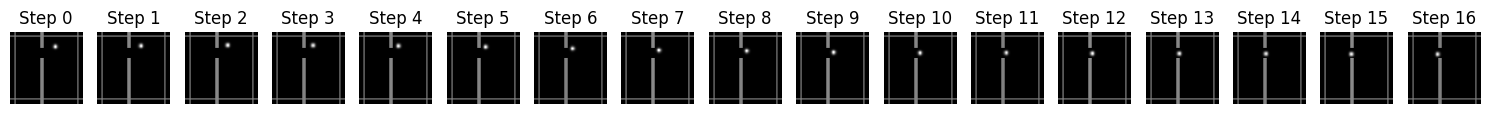

In [4]:
import matplotlib.pyplot as plt

# Visualizing a single trajectory (states and actions)
def visualize_trajectory(states, actions, trajectory_index=0):
    """
    Visualizes the given trajectory with agent positions and walls.
    """
    trajectory_states = states[trajectory_index]
    trajectory_actions = actions[trajectory_index]
    
    num_steps = trajectory_states.shape[0]
    fig, axes = plt.subplots(1, num_steps, figsize=(15, 5))
    
    for i, ax in enumerate(axes):
        if i < num_steps:
            # The two channels of the state image
            agent_layer = trajectory_states[i, 0]  # Agent position
            walls_layer = trajectory_states[i, 1]  # Walls and borders
            
            # Combine the layers for visualization
            combined_image = agent_layer + walls_layer * 0.5
            
            ax.imshow(combined_image, cmap='gray')
            ax.set_title(f"Step {i}")
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize the first trajectory
if 'states' in locals() and 'actions' in locals():
    visualize_trajectory(states, actions, trajectory_index=0)

In [5]:
def plot_matrix_with_values(matrix):
    """
    Plots a 2D NumPy matrix with values displayed in each cell.

    Parameters:
    matrix (numpy.ndarray): 2D matrix to be visualized.

    """
    if not isinstance(matrix, np.ndarray) or matrix.ndim != 2:
        raise ValueError("Input must be a 2D NumPy array.")

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust size as needed
    cax = ax.matshow(matrix, cmap='viridis')  # Use a colormap of your choice

    # Add color bar
    fig.colorbar(cax)

    # Display values in each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            value = matrix[i, j]
            # ax.text(j, i, f"{value:.2f}", va='center', ha='center', color='white' if value < matrix.max() / 2 else 'black')

    # Set axis labels
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_yticks(range(matrix.shape[0]))
    ax.set_xticklabels(range(1, matrix.shape[1] + 1))
    ax.set_yticklabels(range(1, matrix.shape[0] + 1))
    ax.xaxis.set_ticks_position('bottom')  # Move x-axis ticks to the bottom

    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.title("Matrix Visualization with Values")
    plt.show()

-1.4306358 -1.4306358


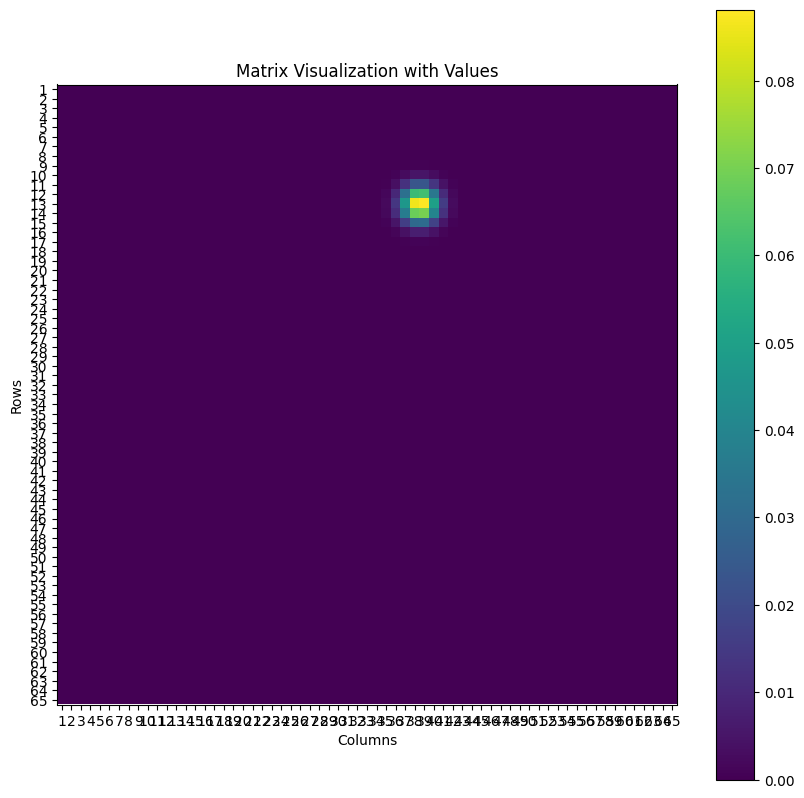

In [6]:
k = 2
print(actions[0][k][0], actions[0][k][0])
plot_matrix_with_values(states[0][k][0])

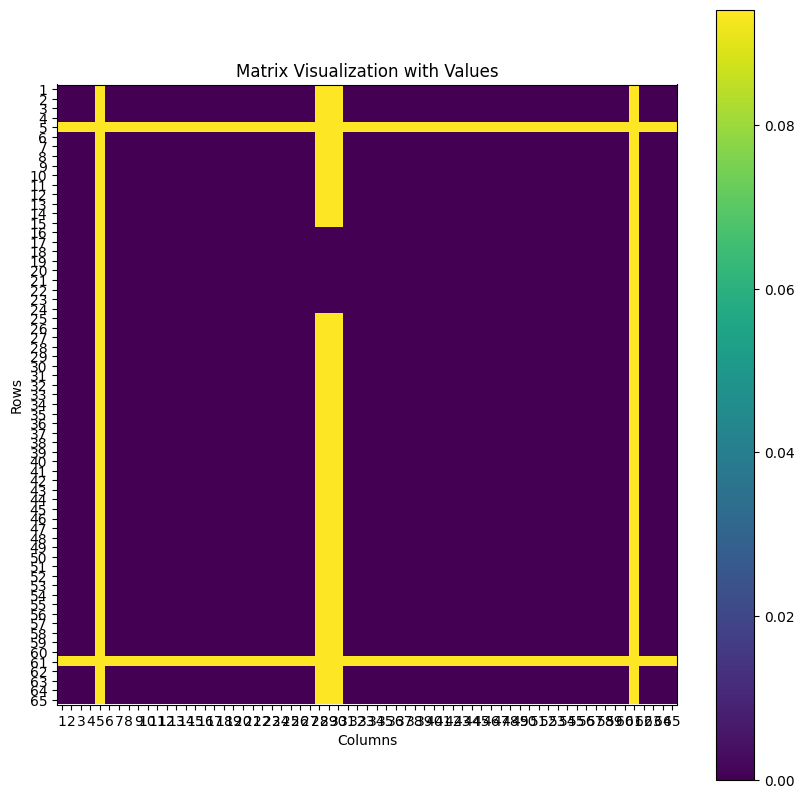

In [7]:
plot_matrix_with_values(states[0][0][1])